In [1]:
import os
import sys

In [2]:
os.environ['MUJOCO_GL'] = 'egl'

In [3]:
import time

from absl import app
from absl import flags
from dm_control.suite import humanoid_CMU
from dm_control.suite.utils import parse_amc
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation
import numpy as np
from IPython.display import HTML
%matplotlib inline

In [4]:
env = humanoid_CMU.stand()

In [5]:
def parse(file_name):
  """Parses the amc file format."""
  values = []
  fid = open(file_name, 'r')
  line = fid.readline().strip()
  frame_ind = 1
  first_frame = True
  while True:
    # Parse first frame.
    if first_frame and line[0] == str(frame_ind):
      first_frame = False
      frame_ind += 1
      frame_vals = []
      while True:
        line = fid.readline().strip()
        if not line or line == str(frame_ind):
          values.append(np.array(frame_vals, dtype=np.float))
          break
        tokens = line.split()
        frame_vals.extend(tokens[1:])
    # Parse other frames.
    elif line == str(frame_ind):
      frame_ind += 1
      frame_vals = []
      while True:
        line = fid.readline().strip()
        if not line or line == str(frame_ind):
          values.append(np.array(frame_vals, dtype=np.float))
          break
        tokens = line.split()
        frame_vals.extend(tokens[1:])
    else:
      line = fid.readline().strip()
      if not line:
        break
  return values

In [6]:
import pandas as pd

In [7]:
xt = [ ]
yt = [ ]
ct = [ ]
start = 0
for regime in range(1,13):
    measurements = pd.read_csv('/srv/data/ltcl/data/mocap_point_cloud/07_%02d.csv'%regime, header=None, index_col=0).values
    latents = np.stack(parse('/srv/data/ltcl/data/all_asfamc/subjects/07/07_%02d.amc'%regime))
#     latents = latents[:, sel_joint_idx]
    print(start, start+len(latents)-6)
    start = start + len(latents)
    length = latents.shape[0]
    xt.append(measurements)
    yt.append(latents)
    ct.append(np.ones(length)*(regime-1))

0 310
316 639
645 1054
1060 1503
1509 2020
2026 2437
2443 2816
2822 3178
3184 3484
3490 3785
3791 4100
4106 4363


/tmp/ipykernel_22608/2859923234.py:17: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  values.append(np.array(frame_vals, dtype=np.float))
/tmp/ipykernel_22608/2859923234.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  values.append(np.array(frame_vals, dtype=np.float))


In [128]:
np.savez_compressed('/srv/data/ltcl/data/mocap_point_cloud/data', xt=np.concatenate(yt), ct=np.concatenate(ct).reshape(-1,1))

In [49]:
true_latents = np.stack(parse('/srv/data/ltcl/data/all_asfamc/subjects/07/07_1.amc'))

/tmp/ipykernel_9660/2859923234.py:17: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  values.append(np.array(frame_vals, dtype=np.float))
/tmp/ipykernel_9660/2859923234.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  values.append(np.array(frame_vals, dtype=np.float))


In [8]:
true_latents.shape

NameError: name 'true_latents' is not defined

In [9]:
_CMU_MOCAP_JOINT_ORDER = np.array([
    'root0', 'root1', 'root2', 'root3', 'root4', 'root5', 'lowerbackrx',
    'lowerbackry', 'lowerbackrz', 'upperbackrx', 'upperbackry', 'upperbackrz',
    'thoraxrx', 'thoraxry', 'thoraxrz', 'lowerneckrx', 'lowerneckry',
    'lowerneckrz', 'upperneckrx', 'upperneckry', 'upperneckrz', 'headrx',
    'headry', 'headrz', 'rclaviclery', 'rclaviclerz', 'rhumerusrx',
    'rhumerusry', 'rhumerusrz', 'rradiusrx', 'rwristry', 'rhandrx', 'rhandrz',
    'rfingersrx', 'rthumbrx', 'rthumbrz', 'lclaviclery', 'lclaviclerz',
    'lhumerusrx', 'lhumerusry', 'lhumerusrz', 'lradiusrx', 'lwristry',
    'lhandrx', 'lhandrz', 'lfingersrx', 'lthumbrx', 'lthumbrz', 'rfemurrx',
    'rfemurry', 'rfemurrz', 'rtibiarx', 'rfootrx', 'rfootrz', 'rtoesrx',
    'lfemurrx', 'lfemurry', 'lfemurrz', 'ltibiarx', 'lfootrx', 'lfootrz',
    'ltoesrx'
])

In [10]:
selected_joints = ['root0', 'root1', 'root2', 'root3', 'root4', 'root5',
 'lowerbackrx', 'lowerbackry', 'lowerbackrz',
 'upperbackrx', 'upperbackry', 'upperbackrz',
 'thoraxrx', 'thoraxry', 'thoraxrz',
 'lowerneckrx', 'lowerneckry', 'lowerneckrz', 
 'upperneckrx', 'upperneckry', 'upperneckrz',
 'headrx', 'headry', 'headrz',
 'rclaviclery', 'rclaviclerz',
 'rhumerusrx', 'rhumerusry', 'rhumerusrz',
 'rradiusrx',
 'rwristry',
 'rfemurrx', 'rfemurry', 'rfemurrz',
 'rtibiarx',
 'rfootrx', 'rfootrz'
 ]

In [11]:
sel_joint_idx  = [ ]
for joint in selected_joints:
    sel_joint_idx.append(np.where(_CMU_MOCAP_JOINT_ORDER==joint)[0][0])

In [12]:
from dm_control.suite.utils.parse_amc import Amcvals2qpos

In [13]:
selected_joints = ['root5', 'lowerbackrz', 'upperbackrz', 'thoraxrz', 'lowerneckrz', 'upperneckrz', 'headrz',
 'rclaviclerz', 'rhumerusrz', 'rradiusrx', 'rwristry', 'rfemurrz', 'rtibiarx', 'rfootrz']

In [14]:
latent_idx = 6

In [71]:
videos = [ ]
for latent_idx in [2,3,6]:
    frame_values = np.load('/home/weiran/data/travesal%d.npy'%latent_idx)
    joint2index = {}
    for name in env.physics.named.data.qpos.axes.row.names:
        joint2index[name] = env.physics.named.data.qpos.axes.row.convert_key_item(name)
    index2joint = {}
    for joint, index in joint2index.items():
        if isinstance(index, slice):
            indices = range(index.start, index.stop)
        else:
            indices = [index]
        for ii in indices:
            index2joint[ii] = joint

      # Convert frame_values to qpos
    amcvals2qpos_transformer = Amcvals2qpos(index2joint, _CMU_MOCAP_JOINT_ORDER)
    qpos_values = []
    for frame_value in frame_values:
        qpos_values.append(amcvals2qpos_transformer(frame_value))
    qpos_values = np.stack(qpos_values).T  # Time by nq
    max_frame = min(10000, qpos_values.shape[1] - 1)
    camera_id = 2
    width = 256
    height = 256
    video = np.zeros((max_frame, height, width, 3), dtype=np.uint8)

    for i in range(max_frame):
        p_i = qpos_values[:, i]
        with env.physics.reset_context():
            env.physics.data.qpos[:] = p_i
        mask = env.physics.render(height, width, camera_id=camera_id, segmentation=True)[:,:,0] == 0
        image = env.physics.render(height, width, camera_id=camera_id)
        image[mask] = 255
        video[i] = np.rot90(image,2)
    videos.append(video)

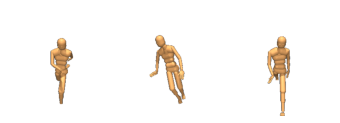

In [72]:
video = np.hstack(videos)
video = np.concatenate(videos, axis=2)
img = [] # some array of images
frames = [] # for storing the generated images
fig = plt.figure(figsize=(6,2))
plt.axis('off')
for i in range(len(video)):
    frames.append([plt.imshow(video[i], cmap=cm.Greys_r,animated=True)])

ani = animation.ArtistAnimation(fig, frames, interval=50, blit=True,
                                repeat_delay=1000)
HTML(ani.to_html5_video())

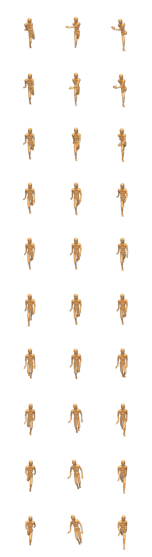

In [73]:
from matplotlib.backends.backend_pdf import PdfPages
with PdfPages('/home/weiran/figs/' + '/mocap_traversal_leap.pdf') as pdf:
    fig, axs = plt.subplots(10, 1, figsize=(10,10))
    for i in range(10):
        frame_idx = min(i * 10,98)
        axs[i].imshow(video[frame_idx], cmap=cm.Greys_r,animated=False)
        axs[i].axis('off')
    pdf.savefig(fig, bbox_inches="tight")

In [41]:
videos = [ ]
for latent_idx in range(8):
    frame_values = np.load('/home/weiran/data/slow_travesal%d.npy'%latent_idx)
    joint2index = {}
    for name in env.physics.named.data.qpos.axes.row.names:
        joint2index[name] = env.physics.named.data.qpos.axes.row.convert_key_item(name)
    index2joint = {}
    for joint, index in joint2index.items():
        if isinstance(index, slice):
            indices = range(index.start, index.stop)
        else:
            indices = [index]
        for ii in indices:
            index2joint[ii] = joint

      # Convert frame_values to qpos
    amcvals2qpos_transformer = Amcvals2qpos(index2joint, _CMU_MOCAP_JOINT_ORDER)
    qpos_values = []
    for frame_value in frame_values:
        qpos_values.append(amcvals2qpos_transformer(frame_value))
    qpos_values = np.stack(qpos_values).T  # Time by nq
    max_frame = min(10000, qpos_values.shape[1] - 1)
    camera_id = 2
    width = 256
    height = 256
    video = np.zeros((max_frame, height, width, 3), dtype=np.uint8)

    for i in range(max_frame):
        p_i = qpos_values[:, i]
        with env.physics.reset_context():
            env.physics.data.qpos[:] = p_i
        mask = env.physics.render(height, width, camera_id=camera_id, segmentation=True)[:,:,0] == 0
        image = env.physics.render(height, width, camera_id=camera_id)
        image[mask] = 255
        video[i] = np.rot90(image,2)
    videos.append(video)

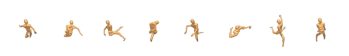

In [42]:
video = np.hstack(videos)
video = np.concatenate(videos, axis=2)
img = [] # some array of images
frames = [] # for storing the generated images
fig = plt.figure(figsize=(6,2))
plt.axis('off')
for i in range(len(video)):
    frames.append([plt.imshow(video[i], cmap=cm.Greys_r,animated=True)])

ani = animation.ArtistAnimation(fig, frames, interval=50, blit=True,
                                repeat_delay=1000)
HTML(ani.to_html5_video())

In [74]:
videos = [ ]
for latent_idx in range(8):
    frame_values = np.load('/home/weiran/data/slow_travesal%d.npy'%latent_idx)
    joint2index = {}
    for name in env.physics.named.data.qpos.axes.row.names:
        joint2index[name] = env.physics.named.data.qpos.axes.row.convert_key_item(name)
    index2joint = {}
    for joint, index in joint2index.items():
        if isinstance(index, slice):
            indices = range(index.start, index.stop)
        else:
            indices = [index]
        for ii in indices:
            index2joint[ii] = joint

      # Convert frame_values to qpos
    amcvals2qpos_transformer = Amcvals2qpos(index2joint, _CMU_MOCAP_JOINT_ORDER)
    qpos_values = []
    for frame_value in frame_values:
        qpos_values.append(amcvals2qpos_transformer(frame_value))
    qpos_values = np.stack(qpos_values).T  # Time by nq
    max_frame = min(10000, qpos_values.shape[1] - 1)
    camera_id = 2
    width = 256
    height = 256
    video = np.zeros((max_frame, height, width, 3), dtype=np.uint8)

    for i in range(max_frame):
        p_i = qpos_values[:, i]
        with env.physics.reset_context():
            env.physics.data.qpos[:] = p_i
        mask = env.physics.render(height, width, camera_id=camera_id, segmentation=True)[:,:,0] == 0
        image = env.physics.render(height, width, camera_id=camera_id)
        image[mask] = 255
        video[i] = np.rot90(image,2)
    videos.append(video)

In [75]:
video = np.hstack(videos)

In [76]:
video = np.concatenate(videos, axis=2)

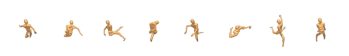

In [77]:
img = [] # some array of images
frames = [] # for storing the generated images
fig = plt.figure(figsize=(6,2))
plt.axis('off')
for i in range(len(video)):
    frames.append([plt.imshow(video[i], cmap=cm.Greys_r,animated=True)])

ani = animation.ArtistAnimation(fig, frames, interval=50, blit=True,
                                repeat_delay=1000)
HTML(ani.to_html5_video())

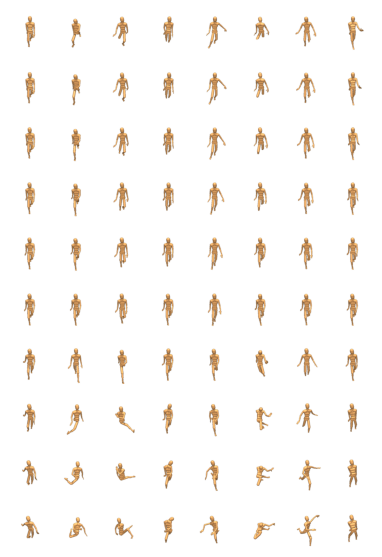

In [78]:
from matplotlib.backends.backend_pdf import PdfPages
with PdfPages('/home/weiran/figs/' + '/mocap_traversal_beta.pdf') as pdf:
    fig, axs = plt.subplots(10, 1, figsize=(10,10))
    for i in range(10):
        frame_idx = min(i * 10,98)
        axs[i].imshow(video[frame_idx], cmap=cm.Greys_r,animated=False)
        axs[i].axis('off')
    pdf.savefig(fig, bbox_inches="tight")

In [23]:
latent_idx = 2

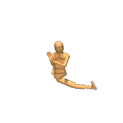

In [24]:
frame_values = np.load('/home/weiran/data/beta_travesal%d.npy'%latent_idx)
joint2index = {}
for name in env.physics.named.data.qpos.axes.row.names:
    joint2index[name] = env.physics.named.data.qpos.axes.row.convert_key_item(name)
index2joint = {}
for joint, index in joint2index.items():
    if isinstance(index, slice):
        indices = range(index.start, index.stop)
    else:
        indices = [index]
    for ii in indices:
        index2joint[ii] = joint

  # Convert frame_values to qpos
amcvals2qpos_transformer = Amcvals2qpos(index2joint, _CMU_MOCAP_JOINT_ORDER)
qpos_values = []
for frame_value in frame_values:
    qpos_values.append(amcvals2qpos_transformer(frame_value))
qpos_values = np.stack(qpos_values).T  # Time by nq
max_frame = min(10000, qpos_values.shape[1] - 1)
camera_id = 2
width = 256
height = 256
video = np.zeros((max_frame, height, width, 3), dtype=np.uint8)

for i in range(max_frame):
    p_i = qpos_values[:, i]
    with env.physics.reset_context():
        env.physics.data.qpos[:] = p_i
    mask = env.physics.render(height, width, camera_id=camera_id, segmentation=True)[:,:,0] == 0
    image = env.physics.render(height, width, camera_id=camera_id)
    image[mask] = 255
    video[i] = np.rot90(image,2)
img = [] # some array of images
frames = [] # for storing the generated images
fig = plt.figure(figsize=(2,2))
plt.axis('off')
for i in range(len(video)):
    frames.append([plt.imshow(video[i], cmap=cm.Greys_r,animated=True)])

ani = animation.ArtistAnimation(fig, frames, interval=50, blit=True,
                                repeat_delay=1000)
HTML(ani.to_html5_video())

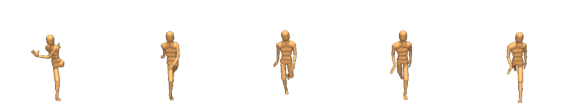

In [399]:
from matplotlib.backends.backend_pdf import PdfPages
with PdfPages('/home/weiran/figs/' + '/mocap_traversal_%d.pdf'%latent_idx) as pdf:
    fig, axs = plt.subplots(1, 5, figsize=(10,2))
    for i in range(5):
        frame_idx = min(i * 25,98)
        axs[i].imshow(video[frame_idx], cmap=cm.Greys_r,animated=False)
        axs[i].axis('off')
    pdf.savefig(fig, bbox_inches="tight")

(-0.5, 255.5, 255.5, -0.5)

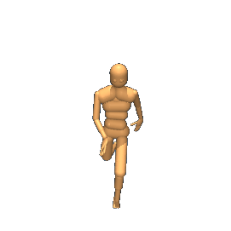

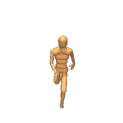

In [300]:
frames[frame_idx][0].figure

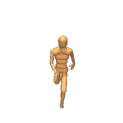

In [287]:
a

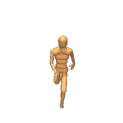

In [268]:
a.figure

In [159]:
converted.qpos.shape

(63, 132)

In [ ]:
# max_frame = min(10000, converted.qpos.shape[1] - 1)
# camera_id = 2
# width = 256
# height = 256
# video = np.zeros((max_frame, height, width, 3), dtype=np.uint8)

# for i in range(max_frame):
#     p_i = converted.qpos[:, i]
#     with env.physics.reset_context():
#         env.physics.data.qpos[:] = p_i
#     mask = env.physics.render(height, width, camera_id=camera_id, segmentation=True)[:,:,0] == 0
#     image = env.physics.render(height, width, camera_id=camera_id)
#     image[mask] = 255
#     video[i] = np.rot90(image,2)
# img = [] # some array of images
# frames = [] # for storing the generated images
# fig = plt.figure(figsize=(2,2))
# plt.axis('off')
# for i in range(len(video)):
#     frames.append([plt.imshow(video[i], cmap=cm.Greys_r,animated=True)])

# ani = animation.ArtistAnimation(fig, frames, interval=50, blit=True,
#                                 repeat_delay=1000)
# # ani.save('movie.mp4')

In [144]:
converted = parse_amc.convert('/srv/data/ltcl/data/all_asfamc/subjects/07/07_01.amc',
                                env.physics, env.control_timestep())

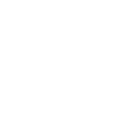

In [145]:
# max_frame = min(10000, converted.qpos.shape[1] - 1)
# camera_id = 2
# width = 256
# height = 256
# video = np.zeros((max_frame, height, width, 3), dtype=np.uint8)

# for i in range(max_frame):
#     p_i = converted.qpos[:, i]
#     with env.physics.reset_context():
#         env.physics.data.qpos[:] = p_i
#     mask = env.physics.render(height, width, camera_id=camera_id, segmentation=True)[:,:,0] == 0
#     image = env.physics.render(height, width, camera_id=camera_id)
#     image[mask] = 255
#     video[i] = np.rot90(image,2)
# img = [] # some array of images
# frames = [] # for storing the generated images
# fig = plt.figure(figsize=(2,2))
# plt.axis('off')
# for i in range(len(video)):
#     frames.append([plt.imshow(video[i], cmap=cm.Greys_r,animated=True)])

# ani = animation.ArtistAnimation(fig, frames, interval=50, blit=True,
#                                 repeat_delay=1000)
# # ani.save('movie.mp4')

In [146]:
HTML(ani.to_html5_video())

In [ ]:
1, -2
-1, 2